C:\Users\jwals\AppData\Local\Temp\ipykernel_17552\2819012733.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


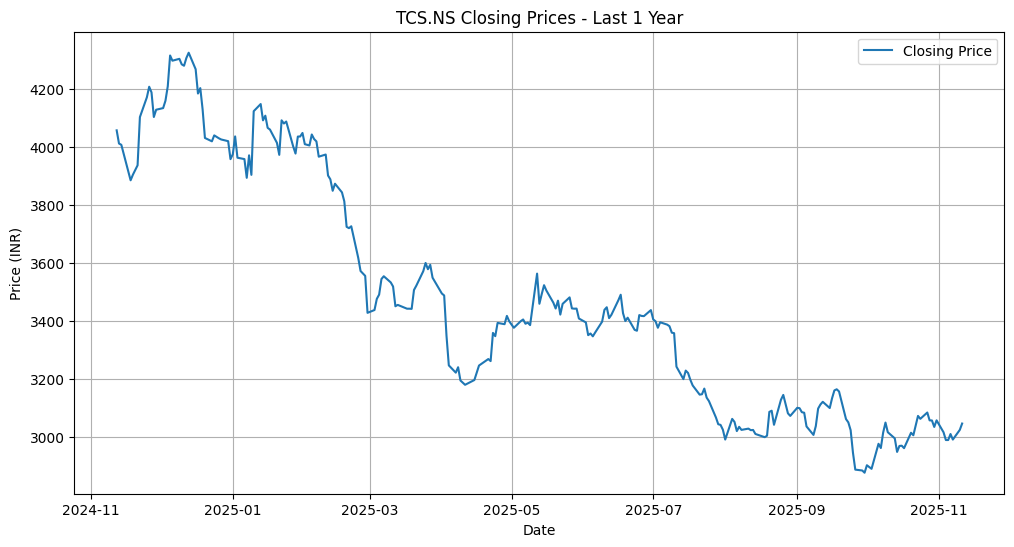

In [ ]:
#1
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns




ticker = "TCS.NS"  # TCS is a well-known NSE India stock
end_date = datetime.now()
start_date = end_date - timedelta(days=365)
# Fetch historical stock data
data = yf.download(ticker, start=start_date, end=end_date)
# Store the closing prices in a DataFrame
df = pd.DataFrame(data['Close'])
df.reset_index(inplace=True)
df.columns = ['Date', 'Close']
#2 Plot the closing price data using matplotlib.
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price')
plt.title(f'{ticker} Closing Prices - Last 1 Year')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()











In [ ]:

df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()



In [ ]:

df['Signal'] = 0
df['Signal'][12:] = np.where(df['EMA_12'][12:] > df['EMA_26'][12:], 1, -1)







C:\Users\jwals\AppData\Local\Temp\ipykernel_17552\2705857180.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Signal'][12:] = np.where(df['EMA_12'][12:] > df['EMA_26'][12:], 1, -1)
C:\Users\jwals\AppData\Local\Temp\ipykernel_17552\270

          Date        Close       EMA_12       EMA_26  Signal
243 2025-11-05  2990.199951  3021.119758  3020.720595       1
244 2025-11-06  3010.899902  3019.547473  3019.993136      -1
245 2025-11-07  2991.800049  3015.278638  3017.904759      -1
246 2025-11-10  3025.199951  3016.804994  3018.445144      -1
247 2025-11-11  3047.000000  3021.450380  3020.560319       1


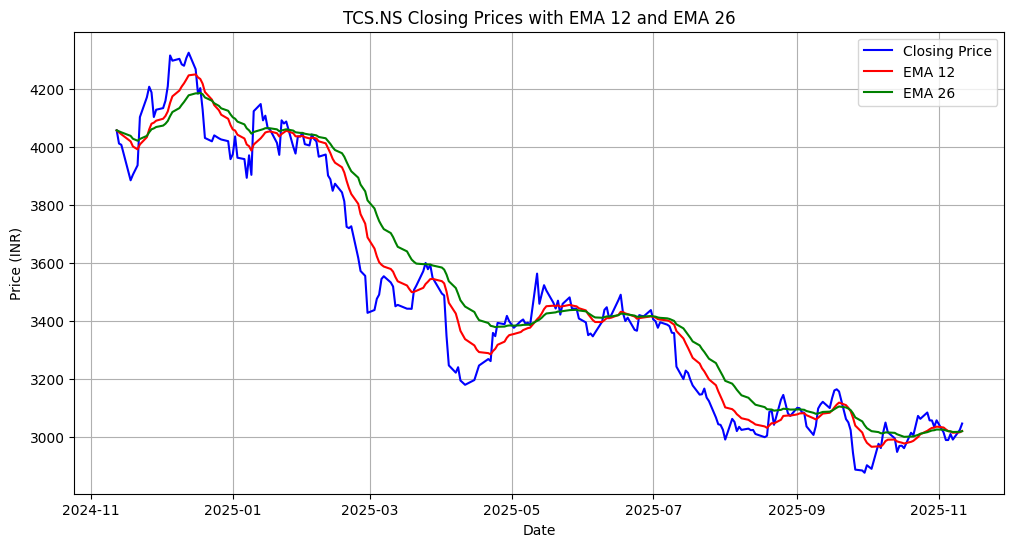

In [9]:

print(df.tail(5))

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.plot(df['Date'], df['EMA_12'], label='EMA 12', color='red')
plt.plot(df['Date'], df['EMA_26'], label='EMA 26', color='green')
plt.title(f'{ticker} Closing Prices with EMA 12 and EMA 26')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()
